# Лабораторная работа №4
## Метрические методы классификации
## Вариант №13

### Цель работы

изучение принципов построения информационных систем с использованием метрических методов классификации.

### Задачи 

 - изучение инструментария Python для реализации алгоритмов метрической классификации;
 - изучение методов оптимизации параметров метрической классификации;
 - освоение модификаций kNN-метода.

#### Подключение библиотек

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

### Индивидуальное задание

1. Подберите набор данных на ресурсах [2, 3] и согласуйте свой выбор с преподавателем и другими студентами группы, так
как работа над одинаковыми наборами данных недопустима..


https://www.kaggle.com/datasets/nphantawee/pump-sensor-data

In [12]:
# Т.к. полная версия файла весит 120+ МБ, есть смысл выбрать из него только нужные значения
dataframe = pd.read_csv("sensor.csv", delimiter=',')
dataframe = dataframe[['timestamp', 
                       'sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04', 
                       'machine_status']]
dataframe = dataframe.sample(50000)
dataframe.to_csv('sensor.csv', index=False)

2. Выполните построение модели классификации на основе метода ближайших соседей. В ходе решения задачи необходимо решить следующие подзадачи:
 
 - Построение классификатора с заданием K (количества ближайших соседей) пользователем; 
 - Вычисление оценки hold-out для различнх значений K, а также для различных долей обучающей и тестирующей подвыборок;
 - Вычисление оценки cross validation для различных значений K, а также для различных значений fold (количества подмножеств при кроссвалидации).
 - Вычислите оптимальные значения K. Обоснуйте свой выбор. Продемонстрируйте использование полученного классификатора.

In [7]:
data_source = "sensor.csv"
df = pd.read_csv(data_source, delimiter=',')

In [8]:
columns_of_interest = ['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04']
df = df[['timestamp'] + columns_of_interest + ['machine_status']]
df.head(5)

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,machine_status
0,2018-05-27 06:02:00,2.459491,47.56944,53.038190,44.878471,627.5463,NORMAL
1,2018-04-15 06:24:00,2.271586,48.43750,49.479160,44.921875,623.1481,NORMAL
2,2018-05-04 01:08:00,2.453588,46.09375,51.649303,44.314240,637.1528,NORMAL
3,2018-06-16 22:21:00,2.502778,48.91493,50.347220,42.751736,636.6898,NORMAL
4,2018-07-06 12:53:00,2.392593,47.26563,50.607635,43.055553,623.0324,NORMAL


In [9]:
df = df.dropna(subset=['timestamp', 'sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04', 'machine_status'])

In [10]:
df['machine_status'].value_counts()

machine_status
NORMAL        46598
RECOVERING      976
BROKEN            3
Name: count, dtype: int64

#### Визуализация данных


После загрузки данных можно визуализировать полученный набор данных. 
Для визуализации будем использовать библиотеку seaborn

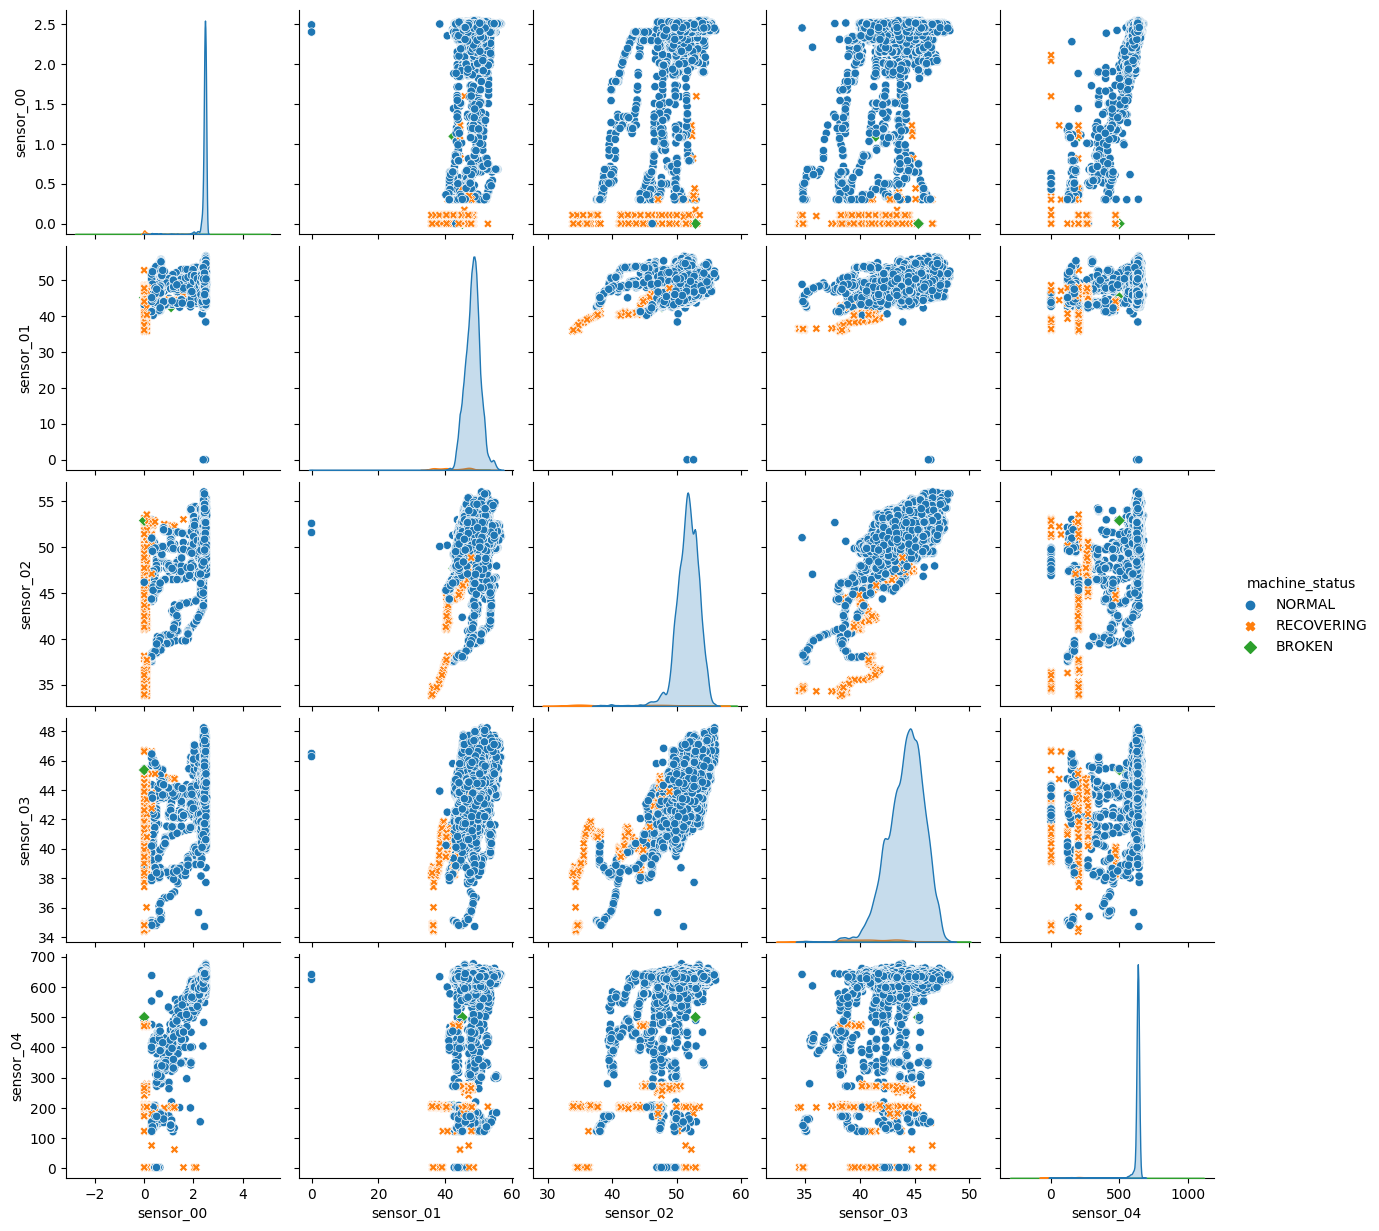

In [44]:
sns.pairplot(df, hue='machine_status', markers=["o", "X", "D"]);

 - Построение классификатора с заданием K (количества ближайших соседей) пользователем; 

In [45]:
from sklearn.neighbors import KNeighborsClassifier

X_train = df[['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04']].values
y_train = df['machine_status'].values

K = 3 # Количество соседей

# Создание и настройка классификатора
knn = KNeighborsClassifier(n_neighbors=K)
# построение модели классификатора (процедура обучения)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [46]:
# Использование классификатора
# Объявление признаков объекта
X_new = np.array([[2.451620, 46.267360, 51.258680, 43.446180, 36.24674]])
# Получение ответа для нового объекта
target = knn.predict(X_new)
print(target)

['NORMAL']


 - Вычисление оценки hold-out для различнх значений K, а также для различных долей обучающей и тестирующей подвыборок;

In [47]:
data = pd.DataFrame(df, columns=['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04'])
data['answer'] = df['machine_status']

In [48]:
# Оценка точности классификатора с использованием методики hold-out

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_holdout, y_train, y_holdout = train_test_split(
    data[['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04']], 
    data['answer'], 
    test_size=0.3, 
    random_state=17)

K = 3 # Количество соседей
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_holdout)
accur = accuracy_score(y_holdout, knn_pred)
print('accuracy: ', accur)

accuracy:  0.9991606043648573


 - Вычисление оценки cross validation для различных значений K, а также для различных значений fold (количества подмножеств при кроссвалидации).

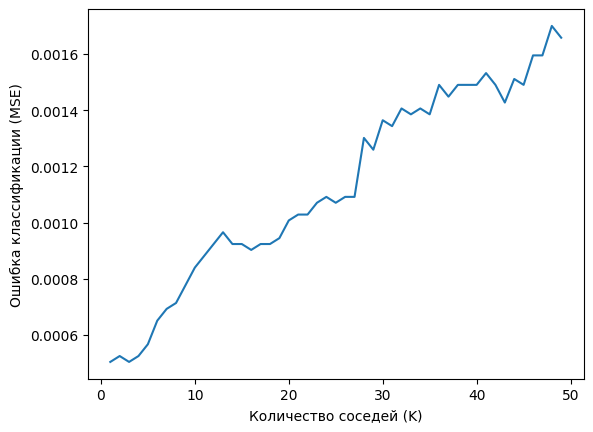

Оптимальные значения K:  [3]


In [50]:
# Реализация процедуры выбора оптимального параметра на основе cross validation error
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Значения параметра K
k_list = list(range(1,50))
# Пустой список для хранения значений точности
cv_scores = []
# В цикле проходим все значения K
for K in k_list:
    knn = KNeighborsClassifier(n_neighbors=K)
    scores = cross_val_score(
        knn, 
        data.iloc[ : , 0:4 ], 
        data['answer'], 
        cv=3, 
        scoring='accuracy')
    cv_scores.append(scores.mean())

# Вычисляем ошибку (misclassification error)
MSE = [1-x for x in cv_scores]

# Строим график
plt.plot(k_list, MSE)
plt.xlabel('Количество соседей (K)');
plt.ylabel('Ошибка классификации (MSE)')
plt.show()

# Ищем минимум
k_min = min(MSE)

# Пробуем найти прочие минимумы (если их несколько)
all_k_min = []
for i in range(len(MSE)):
    if MSE[i] <= k_min:
        all_k_min.append(k_list[i])

# печатаем все K, оптимальные для модели
print('Оптимальные значения K: ', all_k_min)

 - Вычислите оптимальные значения K. Обоснуйте свой выбор. Продемонстрируйте использование полученного классификатора.

In [51]:
data['answer'] = data['answer'].replace({'NORMAL': 0, 'RECOVERING': 1, 'BROKEN': 2})
data.sample(3)

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,answer
115818,2.446702,51.302080,51.085070,43.880207,635.3009,0
215118,2.499826,50.607640,51.171870,44.791664,628.2813,0
219208,2.400463,49.956596,52.083332,45.659721,643.1713,0


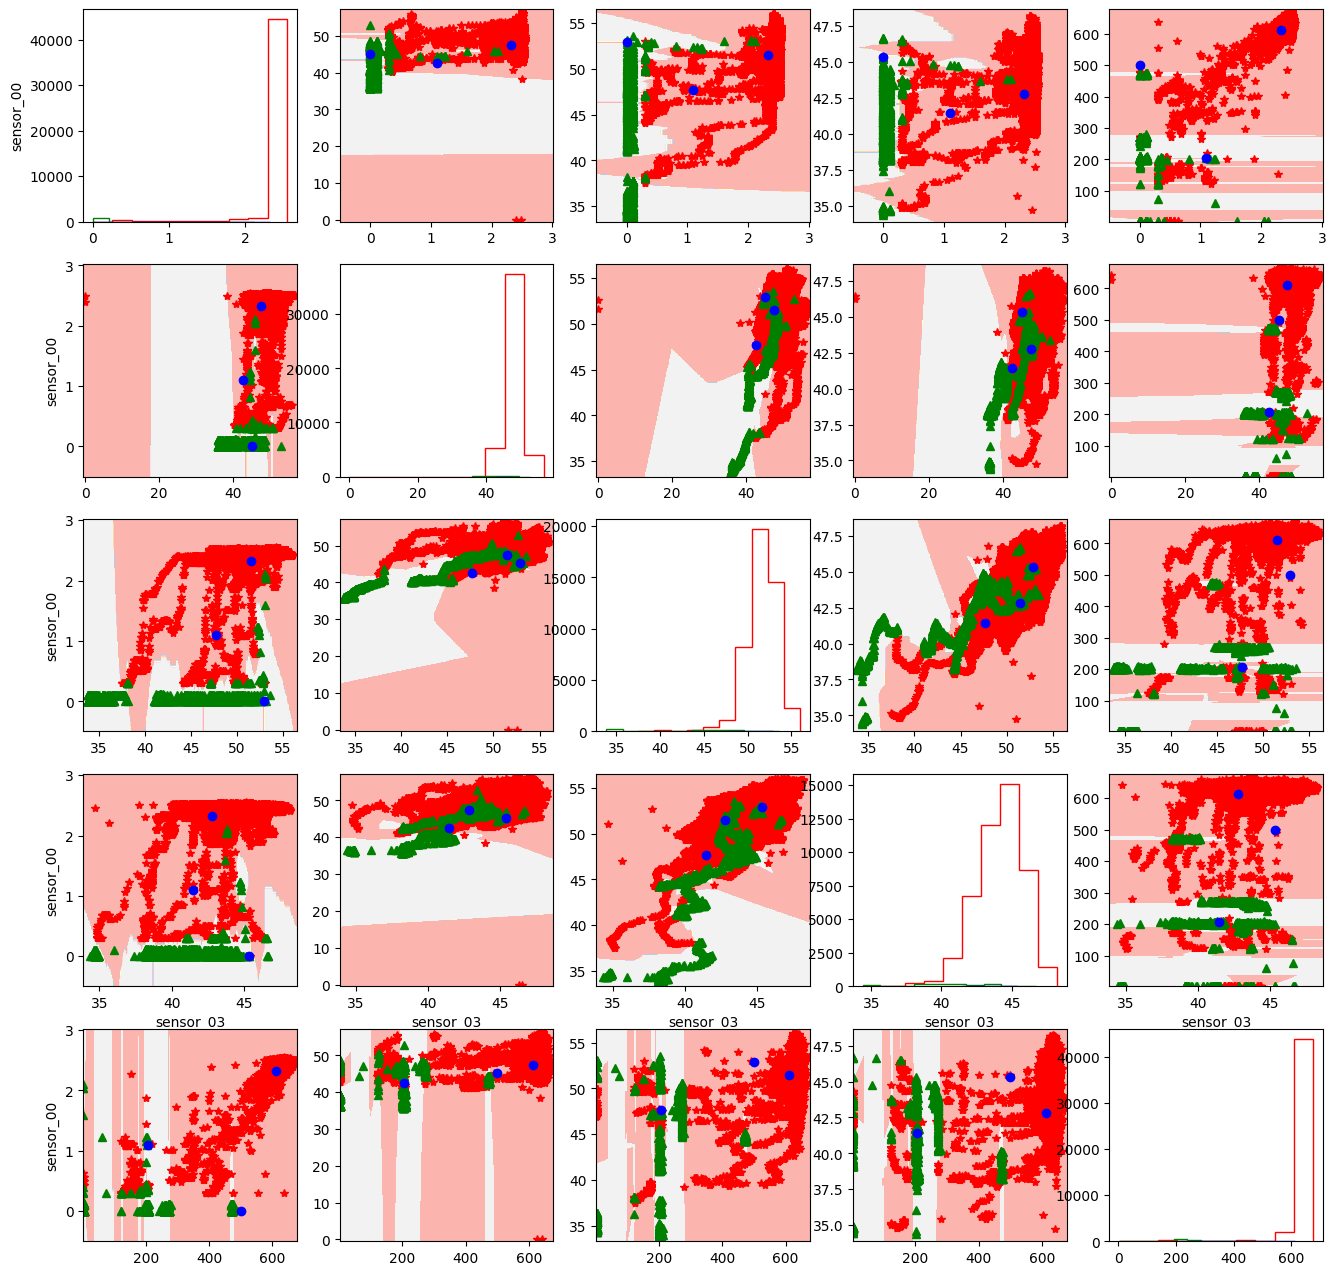

In [53]:
dX = data.iloc[:,0:5]
dX.fillna(dX.mean(), inplace=True)
dy = data['answer']

plot_markers = ['r*', 'g^', 'bo']
answers = dy.unique()

# Создаем подграфики для каждой пары признаков
f, places = plt.subplots(5, 5, figsize=(16,16))

fmin = dX.min()-0.5
fmax = dX.max()+0.5
plot_step = 0.08

# Обходим все subplot
for i in range(0,5):
    for j in range(0,5):

        # Строим решающие границы 
        if(i != j):
            xx, yy = np.meshgrid(np.arange(fmin[i], fmax[i], plot_step),
                               np.arange(fmin[j], fmax[j], plot_step))
            model = KNeighborsClassifier(n_neighbors=3)
            model.fit(dX.iloc[:, [i,j]].values, dy.values)
            p = model.predict(np.c_[xx.ravel(), yy.ravel()])
            p = p.reshape(xx.shape)
            places[i,j].contourf(xx, yy, p, cmap='Pastel1') 
      
        # Обход всех классов
        for id_answer in range(len(answers)):
            idx = np.where(dy == answers[id_answer])
            if i==j:
                places[i, j].hist(dX.iloc[idx].iloc[:,i],
                                  color=plot_markers[id_answer][0],
                                 histtype = 'step')
            else:
                places[i, j].plot(dX.iloc[idx].iloc[:,i], dX.iloc[idx].iloc[:,j], 
                                  plot_markers[id_answer], 
                                  label=answers[id_answer], markersize=6)
        
        if j==0:
            places[i, j].set_ylabel(dX.columns[j])
        
        if i==3:
            places[i, j].set_xlabel(dX.columns[i])        

#### Использование модели

In [57]:
from sklearn.neighbors import KNeighborsClassifier

X_train = data[['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04']].values
y_train = data['answer'].values

K = 13 # Найденное оптимальное значение соседей

# Создание и настройка классификатора
knn = KNeighborsClassifier(n_neighbors=K)
# построение модели классификатора (процедура обучения)
knn.fit(X_train, y_train)

# Использование классификатора
# Объявление признаков объекта

sens0 = float(input('Введите данные с датчика 00: '))
sens1 = float(input('Введите данные с датчика 01: '))
sens2 = float(input('Введите данные с датчика 02: '))
sens3 = float(input('Введите данные с датчика 03: '))
sens4 = float(input('Введите данные с датчика 04: '))
X_new = np.array([[sens0, sens1, sens2, sens3, sens4]])

# Получение ответа для нового объекта
target = knn.predict(X_new)

if target == 0:
    machine_status = 'NORMAL'
elif target == 1:
    machine_status = 'RECOVERING'
elif target == 2:
    machine_status = 'BROKEN'

print('\nВведенные данные с датчиков соответствуют состоянию: ', machine_status)

Введите данные с датчика 00:  25.631
Введите данные с датчика 01:  456.2356
Введите данные с датчика 02:  1.642
Введите данные с датчика 03:  1.621
Введите данные с датчика 04:  357.245



Введенные данные с датчиков соответствуют состоянию:  NORMAL


### Содержание отчета и его форма

Отчет по лабораторной работе должен содержать:

1. Номер и название лабораторной работы; задачи лабораторной работы.

2. Реализация каждого пункта подраздела «Индивидуальное задание» с приведением исходного кода программы, диаграмм и графиков для визуализации данных.

3. Ответы на контрольные вопросы.

4. Листинг программного кода с комментариями, показывающие порядок выполнения лабораторной работы, и результаты, полученные в ходе её выполнения.

### Контрольные вопросы

1. Поясните особенности основных методов метрической классификации: метод ближайшего соседа, метод k ближайших соседей.

**Метод ближайшего соседа (1-NN):**
- **Идея:** Принимает решение на основе класса ближайшего образца.
- **Особенности:**
  - Чувствителен к выбросам и шуму.
  - Низкая сложность обучения, высокая сложность предсказания.

**Метод k ближайших соседей (k-NN):**
- **Идея:** Принимает решение на основе класса большинства из k ближайших образцов.
- **Особенности:**
  - Устойчив к выбросам, требует задания параметра k.
  - Также чувствителен к шуму.
  - Вычислительная сложность зависит от k и размера обучающего набора.

**Общие замечания:**
- Оба метода относятся к ленивому обучению.
- Эффективность зависит от данных и может быть неподходящей для больших наборов данных или высокоразмерных признаков.

2. Поясните основные принципы и этапы реализации метода kNN.

**Принципы k-NN:**
1. **Основной принцип:** Классификация на основе большинства классов k ближайших соседей в пространстве признаков.
2. **Расстояние:** Используется метрика расстояния (чаще евклидова).
3. **Параметр k:** Необходимо выбрать количество ближайших соседей.

**Этапы реализации:**
1. **Подготовка данных:** Очистка, масштабирование, разделение.
2. **Метрика расстояния:** Выбор подходящей метрики.
3. **Обучение:** Модель запоминает обучающие данные.
4. **Классификация:** Рассчитываются расстояния, выбираются k ближайших соседей, присваивается мажоритарный класс.
5. **Оценка точности:** Измерение точности на тестовой выборке.
6. **Оптимальное k:** Подбор оптимального значения k.
7. **Обработка результатов:** Анализ ошибок и оптимизация модели.

**Замечание:**
- k-NN чувствителен к выбору метрики и k, требует аккуратной настройки.

3. Поясните принцип выбора количества соседних объектов, по которым определяется принадлежность целевого объекта к результирующему классу.

**Принцип выбора k в методе k-NN:**

1. **Маленькое k:**
   - **Преимущество:** Чувствительность к локальным изменениям.
   - **Недостатки:** Чувствительность к шуму, переобучение.

2. **Большое k:**
   - **Преимущество:** Устойчивость, менее чувствительно.
   - **Недостатки:** Упущение деталей, менее точные предсказания.

3. **Выбор оптимального k:**
   - Использование кросс-валидации и тестовых данных.
   - Поиск баланса между недостатками.

4. **Использование четного k:**
   - Предотвращает "голосование" в равной степени.

5. **Влияние характера данных:**
   - Оптимальное значение зависит от данных.

6. **Эксперименты и анализ:**
   - Эксперименты с разными значениями k.
   - Анализ ошибок при разных k.

**Вывод:**
Выбор k зависит от данных и требует тщательного подбора для оптимальной производительности.

4. В чем заключается метод парзеновского окна?

**Метод парзеновского окна:**

1. **Основной принцип:** Метод парзеновского окна является одним из методов ядерного сглаживания и используется для оценки плотности вероятности или классификации объектов в зависимости от их близости к другим объектам в пространстве признаков.

2. **Оценка плотности вероятности:**
   - Для оценки плотности вероятности объекта, метод парзеновского окна учитывает вес каждого объекта в зависимости от расстояния до целевого объекта.
   - Объекты, находящиеся ближе, имеют больший вес.

3. **Ядро (функция веса):**
   - Определяет вес каждого соседа в зависимости от расстояния.
   - Примеры ядер: гауссовское (нормальное) ядро, прямоугольное ядро, треугольное ядро.

4. **Выбор ширины окна:**
   - Ширина окна (окно сглаживания) регулирует, насколько далеко в пространстве признаков учитываются соседи.
   - Выбор оптимальной ширины окна важен для баланса смещения и разброса модели.

5. **Классификация:**
   - В задачах классификации объект относится к классу, который представлен максимальным количеством соседей в окне.

6. **Преимущества и недостатки:**
   - **Преимущества:** Гибкость, устойчивость к шуму.
   - **Недостатки:** Чувствительность к выбору ядра и ширины окна, требование наличия большого объема данных.

**Заключение:**
Метод парзеновского окна предоставляет гибкий инструмент для оценки плотности вероятности и классификации, позволяя учитывать вклад каждого объекта в зависимости от его близости к целевому объекту.

5. Назовите, какие параметры оптимизируют в методах kNN?

В методах k-NN (k ближайших соседей) оптимизируют следующие параметры:

1. **Количество соседей (k):**
   - **Оптимизация:** Подбор оптимального значения k с использованием методов валидации, кросс-валидации или других подходящих техник.

2. **Метрика расстояния:**
   - **Оптимизация:** Выбор подходящей метрики расстояния (например, евклидово расстояние, манхэттенское расстояние) в зависимости от характера данных и задачи.

3. **Веса соседей:**
   - **Оптимизация:** В некоторых вариантах k-NN можно вводить веса для каждого соседа в зависимости от их расстояния до целевого объекта. Оптимизация весов может улучшить производительность модели.

4. **Препроцессинг данных:**
   - **Оптимизация:** Масштабирование признаков, устранение выбросов, обработка пропущенных значений — различные методы предварительной обработки данных могут влиять на результаты метода k-NN.

5. **Выбор ядра (для парзеновского окна):**
   - **Оптимизация:** В случае метода парзеновского окна выбор подходящего ядра (например, гауссовского) и настройка его параметров может быть ключевым для улучшения производительности.

Оптимизация этих параметров помогает достичь оптимального баланса между смещением и разбросом модели, что важно для достижения высокой точности классификации или регрессии.